<a href="https://colab.research.google.com/github/ashisaxena710/Retail-Sales-Prediction/blob/main/Individual_Colab_Ashi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## ***1. Knowing Data***

### Import Libraries

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Adding this to ignore future warnings
import warnings
warnings.filterwarnings('ignore')

###  Loading Datasets

In [2]:
rossmann_store_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alma Better/Capstone Project 2 /Rossmann Stores Data.csv")
store_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alma Better/Capstone Project 2 /store.csv")

### Viewing Datasets

In [3]:
rossmann_store_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [4]:
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [5]:
print("The shape of Rossmann Store Dataset is",rossmann_store_data.shape ,"\nThe shape of Store Dataset is" ,store_data.shape)

The shape of Rossmann Store Dataset is (1017209, 9) 
The shape of Store Dataset is (1115, 10)


### Dataset Information

In [6]:
rossmann_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


Great! we have no null values in this dataset.

In [7]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [8]:
print("The number of duplicate values present in Rossmann Store Dataset is",rossmann_store_data.duplicated().sum(),"\nThe number of duplicate values present in Store Dataset is",rossmann_store_data.duplicated().sum())

The number of duplicate values present in Rossmann Store Dataset is 0 
The number of duplicate values present in Store Dataset is 0


Great! No duplicate values are there in our both the datsets.

#### Missing Values/Null Values

Above we saw that there are no null values in Rossmann dataset . But we do have null values in Store datset .

In [9]:
# Missing Values/Null Values Count
store_data.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Figure size 720x432 with 0 Axes>

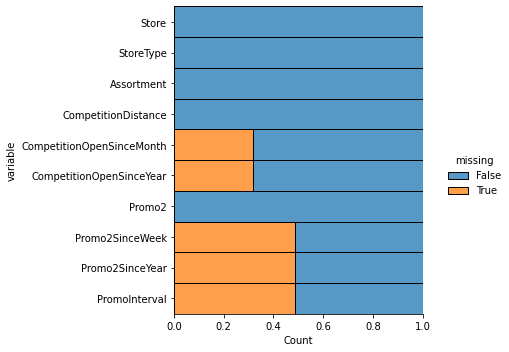

In [10]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=store_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
print("List of columns of Rossmann Dataset :\n" ,list(rossmann_store_data.columns))
print("\n")
print("List of columns of tore Dataset :\n" ,list(store_data.columns))

List of columns of Rossmann Dataset :
 ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


List of columns of tore Dataset :
 ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [12]:
# Dataset Describe
rossmann_store_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [13]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [14]:
# Checking Unique Values for each variable of Rossmann Store Dataset
for i in rossmann_store_data.columns:
  j=rossmann_store_data[i].value_counts().reset_index()
  print("Column name is:",i,"and it value is:\n\t",set(rossmann_store_data[i].unique()))

Column name is: Store and it value is:
	 {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 2

In [15]:
# Checking Unique Values for each variable of Store Dataset
for i in store_data.columns:
  j=store_data[i].value_counts().reset_index()
  print("Column name is:",i,"and it value is:\n\t",set(store_data[i].unique()))

Column name is: Store and it value is:
	 {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 2

We have check the unique values of variables of both the datasets given to us.

## 3. ***Data Wrangling***

While viewing both the datasets, we found that there are no null values in Rossmann Store dateset . But there are null values in Store Dataset.

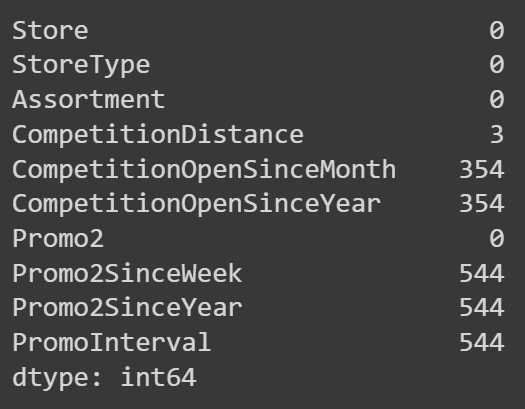

In Store Dataset , the column ' CompetitionDistance ' has 3 null values and the columns ' CompetitionOpenSinceMonth ' and ' CompetitionOpenSinceYear ' have same null value count i.e. 354 . Also , the columns ' Promo2SinceWeek ' , ' Promo2SinceYear ' and ' PromoInterval ' have the same null value count i.e. 544 . That's curious !

In columns ' CompetitionDistance ' , ' CompetitionOpenSinceMonth ' and ' CompetitionOpenSinceYear ' , we can replace null values by median and mode . But by just viewing at the dataset we found that the values of the columns ' Promo2SinceWeek ' , ' Promo2SinceYear ' and ' PromoInterval ' are zero where values of Promo2 are zero.

In [16]:
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(),inplace=True)
store_data['CompetitionOpenSinceMonth'].fillna(store_data['CompetitionOpenSinceMonth'].mode().iloc[0],inplace=True)
store_data['CompetitionOpenSinceYear'].fillna(store_data['CompetitionOpenSinceYear'].mode().iloc[0],inplace=True)

In [17]:
store_data['Promo2SinceWeek'].fillna(0,inplace=True)
store_data['Promo2SinceYear'].fillna(0,inplace=True)
store_data['PromoInterval'].fillna(0,inplace=True)

In [18]:
# Let's now check the null value count...
store_data.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Now we have treated all the null values of Store dataset . 

Let's merge the two given datasets .

In [19]:
# Merging the two dataset 'Rossmann store dataset' and 'Store dataset'
df=rossmann_store_data.merge(store_data,how='inner',on='Store')

In [20]:
# Let's first few rows of our new dataframe
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [21]:
# Checking the shape of new dataframe
print("The shape of new dataframe is",df.shape)
print("\n")

# Checking the info
df.info()

The shape of new dataframe is (1017209, 18)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMont

In [22]:
# Changing the datatype
df['Date']=pd.to_datetime(df['Date'],format="%Y/%m/%d")
df['StateHoliday']=df['StateHoliday'].convert_dtypes('int64')
# df['StoreType']=df['StoreType'].convert_dtypes('int64')
# df['Assortment']=df['Assortment'].convert_dtypes('int64')
df['CompetitionDistance']=df['CompetitionDistance'].convert_dtypes('int64')
df['CompetitionOpenSinceMonth']=df['CompetitionOpenSinceMonth'].convert_dtypes('int64')
df['CompetitionOpenSinceYear']=df['CompetitionOpenSinceYear'].convert_dtypes('int64')
df['Promo2SinceWeek']=df['Promo2SinceWeek'].convert_dtypes('int64')
df['Promo2SinceYear']=df['Promo2SinceYear'].convert_dtypes('int64')

# # Mapping Categorical columns to numerical values
# df['StoreType']    = df['StoreType'].map({'a':1,'b':2,'c':3,'d':4})
# df['Assortment']   = df['Assortment'].map({'a':0, 'c':1,'b':2})
# df['PromoInterval']= df['PromoInterval'].map({'Jan,Apr,Jul,Oct':0, 'Feb,May,Aug,Nov':1,'Mar,Jun,Sept,Dec':2})


In [23]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


### What all manipulations have you done and insights you found?

Observations :

    

*   Min sale is Zero (due to refurbishment) and max sale is 41551 . 
*   Min number of customer on a given day is zero (as some of the stores were closed due to refurbishment , so there were no customers) and max number of customer is 7388 .


*   As per the dates given in the dataset, stores were opened 75% . 
*   75% of stores were running promo .

*   Min competition distance was 20 Km and max competition distance was 75860 km .
*   Min CompetitionOpensinceMonth = 1 and Max CompetitionOpenSinceMonth = 12


*   Min CompetitionOpensinceYear = 1900 (old competition) and Max CompetitionOpenSinceYear = 2015 (new competition)
*   Promo2 - 75%


*   Min Promo2SinceWeek = 0 (actually it must be 1 week . But it is showing zero week as there were stores not running into promo2 ) and Max Promo2SinceWeek = 5
*   Min Promo2SinceYear = 0 (actually it must be year 2009 . But it is showing zero week as there were stores not running into promo2 ) and Max Promo2SinceYear = 2015













## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Our target column is ' Sales ' . Let ' s check the distribution of this column first .

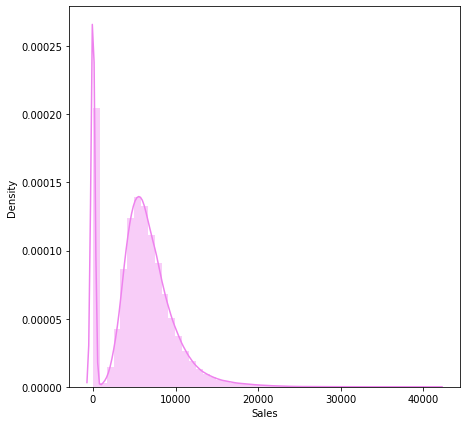

In [24]:
# Sales
plt.figure(figsize=(7,7))
sns.distplot(df['Sales'],color='violet')
plt.show()

Due to refurbishment , most of the stores were closed that's why we have zero sale . Also there were some holidays on which the stores were closed resulting in zero sale . This graph is rightly skewed and in order to deal with this we will use log transformation later in feature engineering . 

Now checking the distribution of other important columns . . .

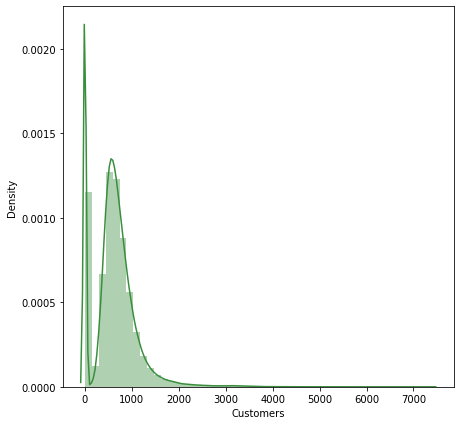

In [25]:
# Customers
plt.figure(figsize=(7,7))
sns.distplot(df['Customers'],color='#388E3C')
plt.show()

Obviously there were zero customers when stores were closed due to any reason.

This graph is rightly skewed and we will use log transformation to normalise it .

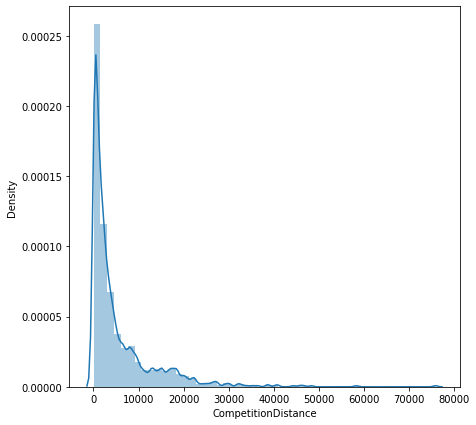

In [26]:
# CompetitionDistance
plt.figure(figsize=(7,7))
sns.distplot(df['CompetitionDistance'])
plt.show()

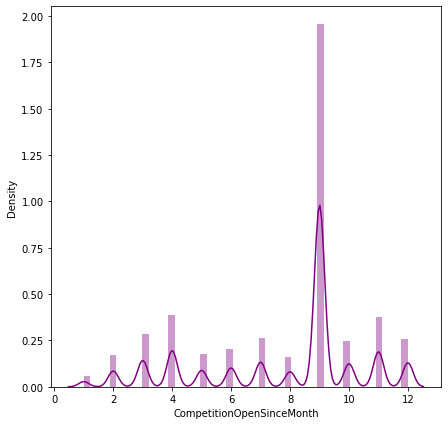

In [27]:
# CompetitionOpenSinceMonth
plt.figure(figsize=(7,7))
sns.distplot(df['CompetitionOpenSinceMonth'],color='purple')
plt.show()

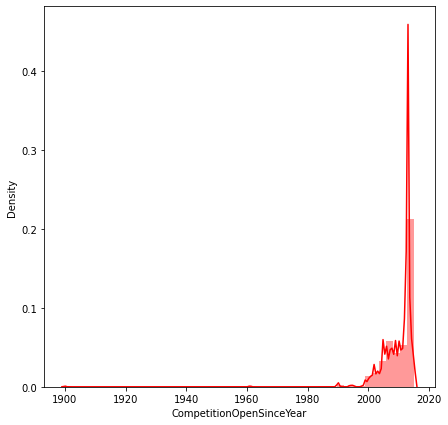

In [28]:
# CompetitionOpenSinceYear
plt.figure(figsize=(7,7))
sns.distplot(df['CompetitionOpenSinceYear'],color='red')
plt.show()

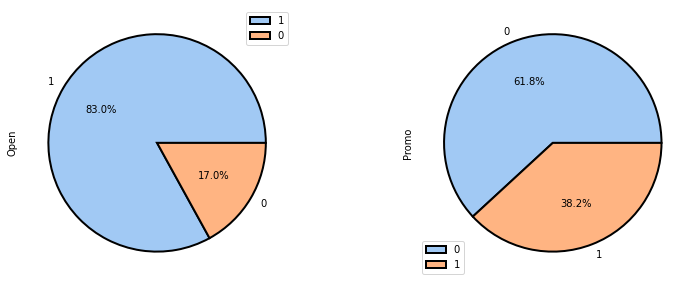

In [29]:
# Open , Promo
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
df["Open"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})

plt.subplot(1,2,2)
df["Promo"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})


plt.show()

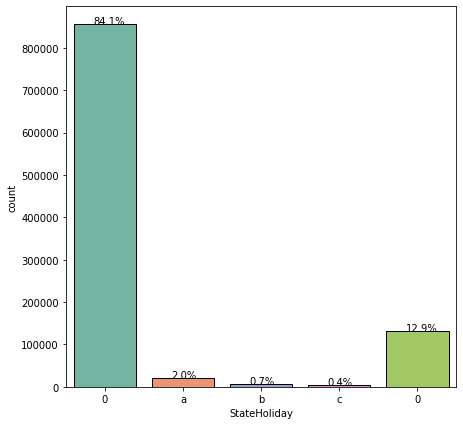

In [30]:
# State holiday and school holiday
plt.figure(figsize=(7,7))

ax=sns.countplot(df['StateHoliday'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}%'.format(100 * p.get_height()/float(len(df['Assortment']))), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

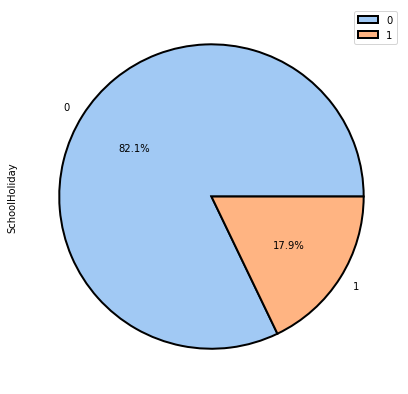

In [31]:
# SchoolHoliday
plt.figure(figsize=(7,7))
df["SchoolHoliday"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})
plt.show()

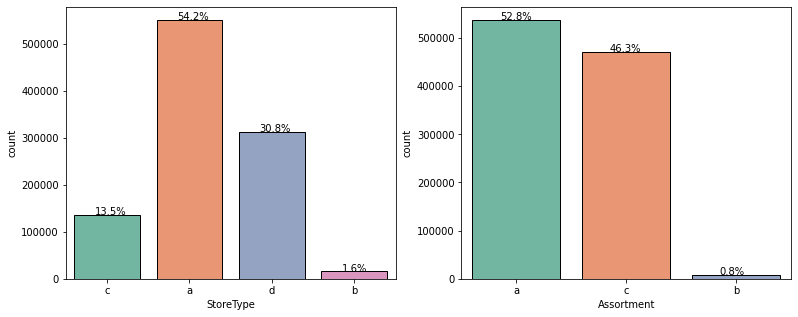

In [32]:
# Store type and assortment 
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
ax=sns.countplot(df['StoreType'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}%'.format(100 * p.get_height()/float(len(df['StoreType']))), (p.get_x()+0.25, p.get_height()+0.01))

plt.subplot(1,2,2)
ax=sns.countplot(df['Assortment'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}%'.format(100 * p.get_height()/float(len(df['Assortment']))), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

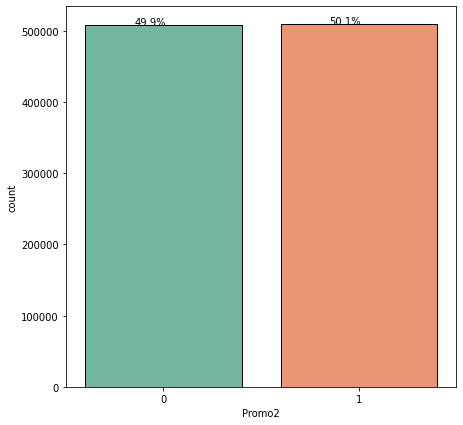

In [33]:
# Promo2
plt.figure(figsize=(7,7))
ax=sns.countplot(df['Promo2'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}%'.format(100 * p.get_height()/float(len(df['Promo']))), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

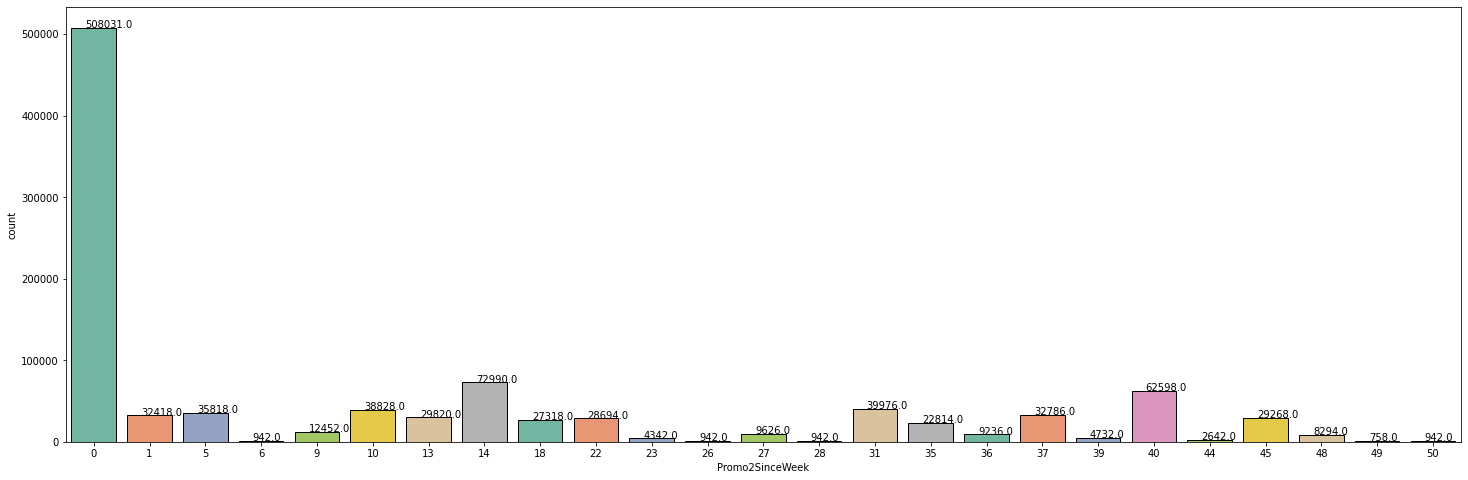

In [34]:
# Promo 2 since weeks and years
plt.figure(figsize=(25,8))

ax=sns.countplot(df['Promo2SinceWeek'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

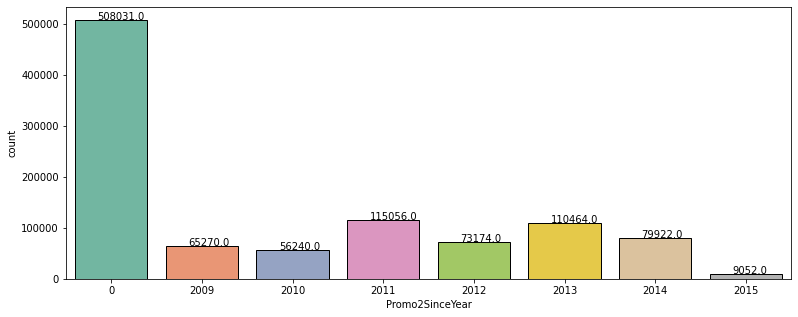

In [35]:
plt.figure(figsize=(13,5))
ax=sns.countplot(df['Promo2SinceYear'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

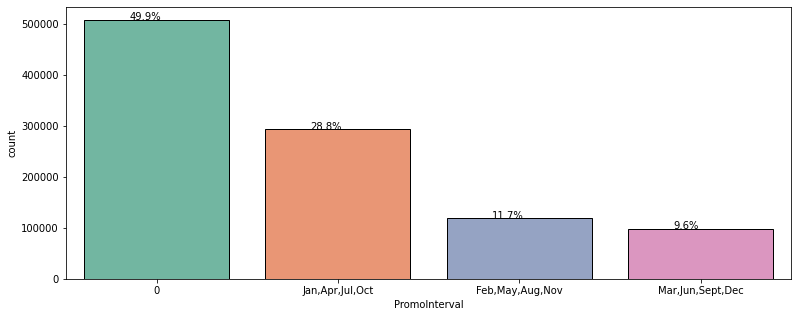

In [36]:
plt.figure(figsize=(13,5))
ax=sns.countplot(df['PromoInterval'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}%'.format(100 * p.get_height()/float(len(df['PromoInterval']))), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

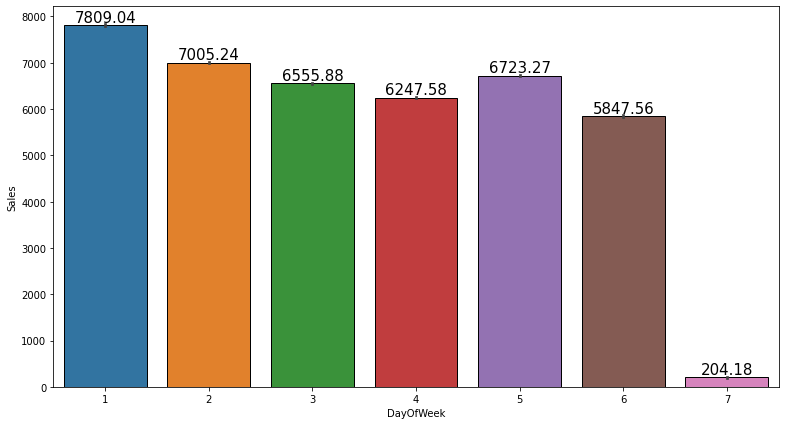

In [37]:
# Sales Vs DayOfWeek
plt.figure(figsize=(13,7))
plots=sns.barplot(x=df['DayOfWeek'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

Sale is least on 7th day of the week i.e on sunday 

In [38]:
# Sale vs Date 
from datetime import date as dt
year=df['Date'].dt.year
month=df['Date'].dt.month
day=df['Date'].dt.day

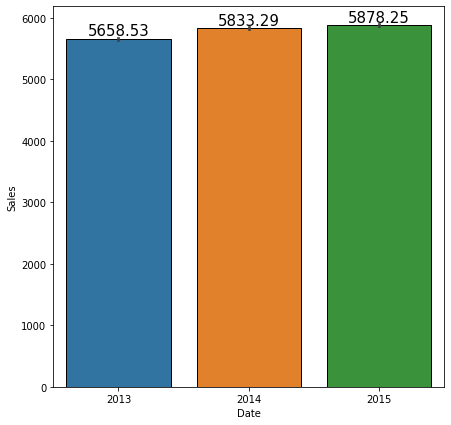

In [39]:
# Sales vs Year
plt.figure(figsize=(7,7))
plots=sns.barplot(x=year,y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.show()

There is not much difference . But the sale has gradually increased . 

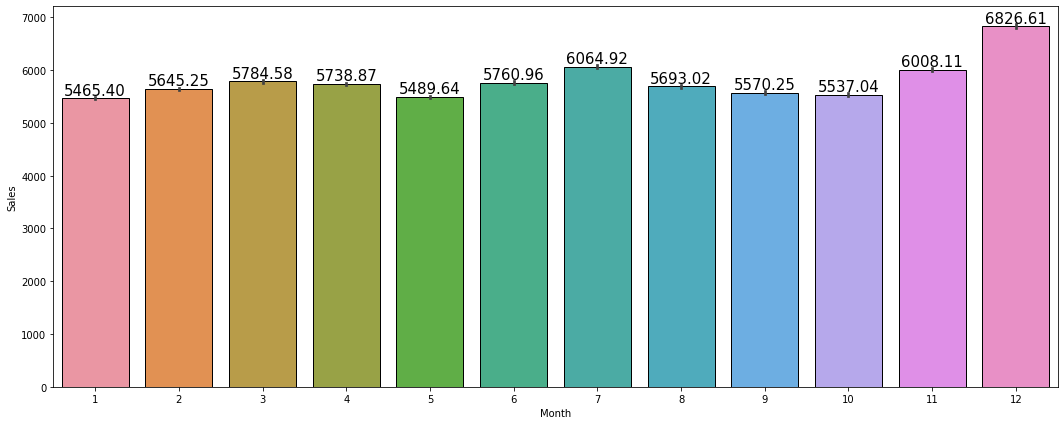

In [40]:
# Sales vs month
plt.figure(figsize=(18,7))
plots=sns.barplot(x=month,y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Month")

plt.show()

Sale is highest in the month of december.

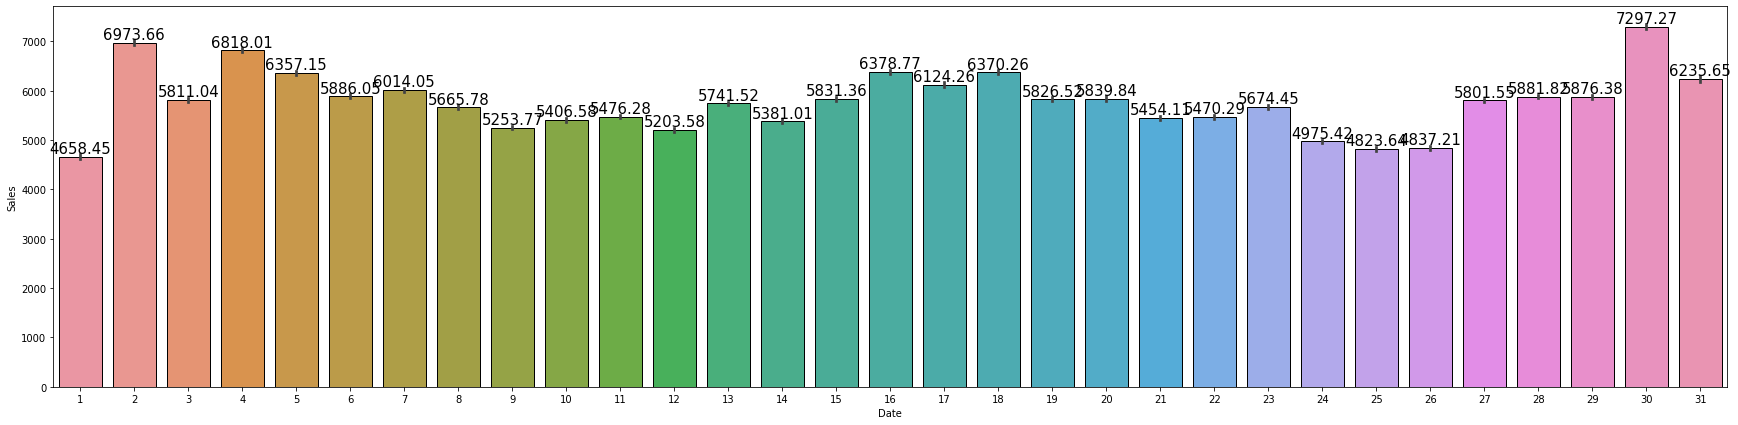

In [41]:
# Sales vs Day
plt.figure(figsize=(30,7))
plots=sns.barplot(x=day,y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.show()

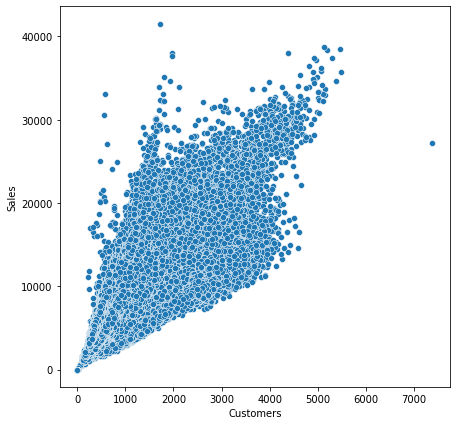

In [42]:
# Sale Vs Customer
plt.figure(figsize=(7,7))
sns.scatterplot(df['Customers'],df['Sales'])

Obviously more number of customers indicate more sales .

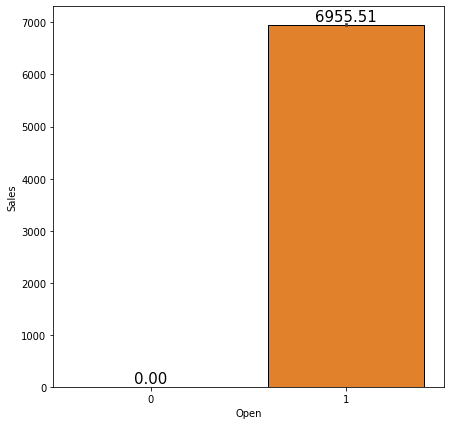

In [43]:
# Sales vs Open
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['Open'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

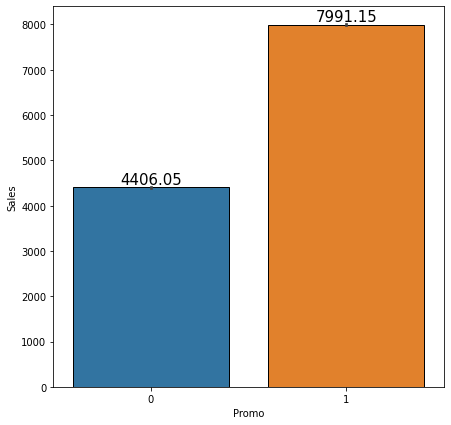

In [44]:
# Sales vs Promo
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['Promo'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

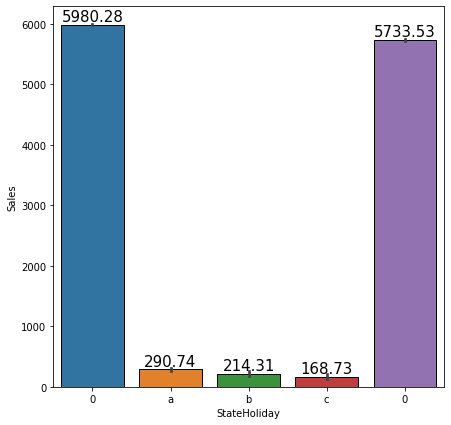

In [45]:
# Sales vs StateHoliday
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['StateHoliday'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

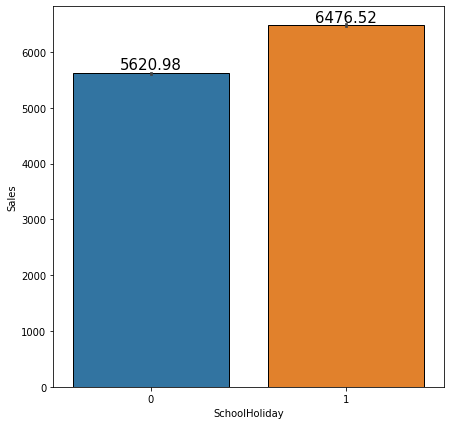

In [46]:
# Sales vs SchoolHoliday

plt.figure(figsize=(7,7))

plots=sns.barplot(x=df['SchoolHoliday'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')    
plt.show()

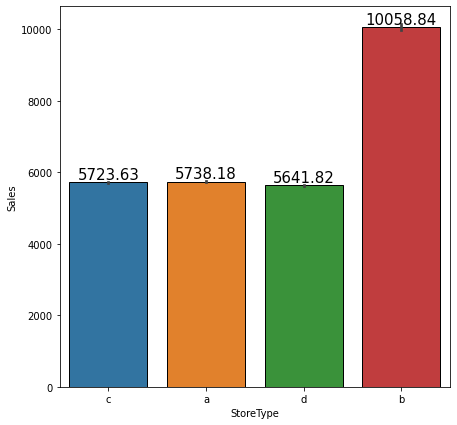

In [47]:
# Sales vs StoreType
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['StoreType'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

Stores which are of type 'b' have more sales . 

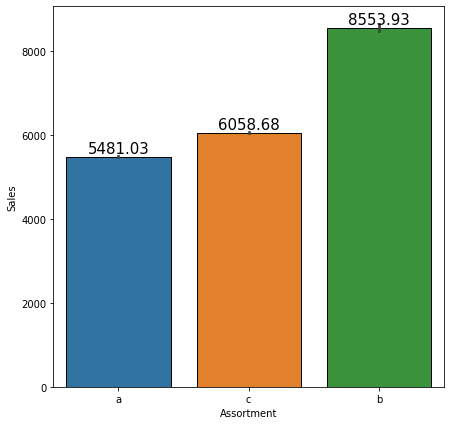

In [48]:
# Sales vs Assortment
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['Assortment'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

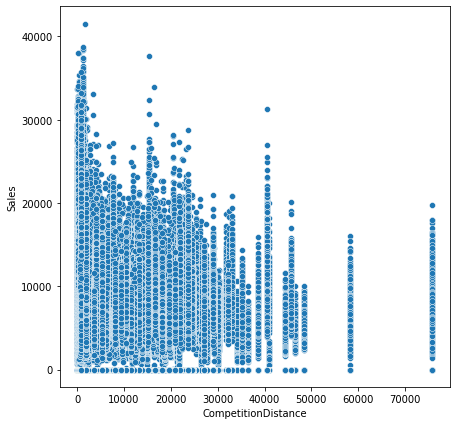

In [49]:
# Sale Vs CompetitionDistance
plt.figure(figsize=(7,7))
sns.scatterplot(df['CompetitionDistance'],df['Sales'])

As the distance between stores increases , the competition decreases . This scatterplot shows that as the competition distance increases , sales decreases . 

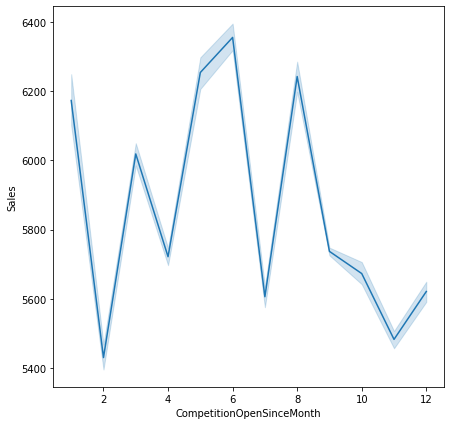

In [50]:
# Sale Vs CompetitionOpenSinceMonth
plt.figure(figsize=(7,7))
sns.lineplot(x=df['CompetitionOpenSinceMonth'], y=df['Sales'])

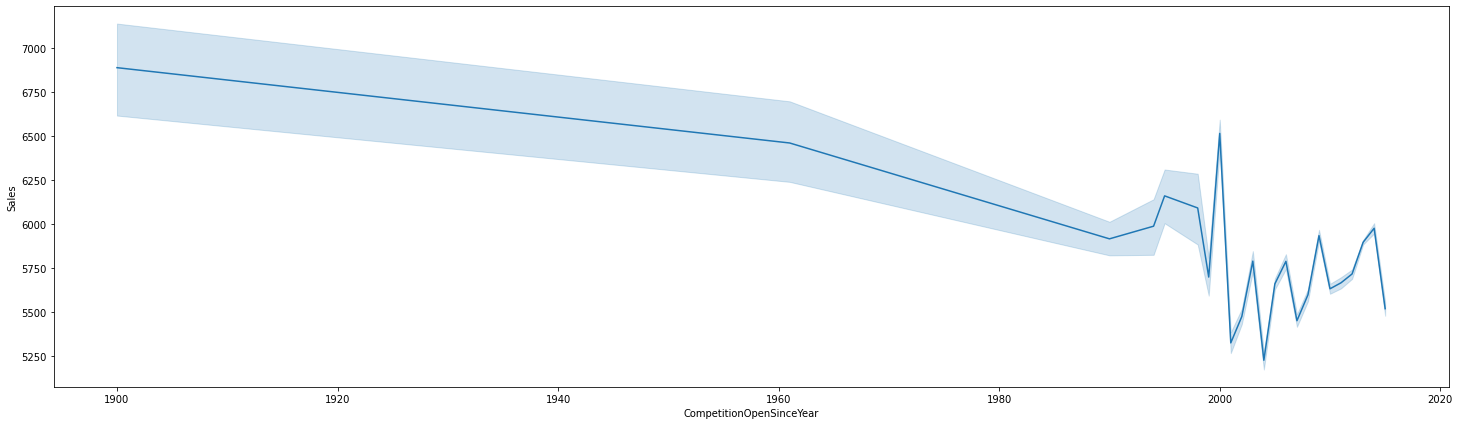

In [51]:
# Sale Vs CompetitionOpenSinceYear
plt.figure(figsize=(25,7))
sns.lineplot(x=df['CompetitionOpenSinceYear'], y=df['Sales'])

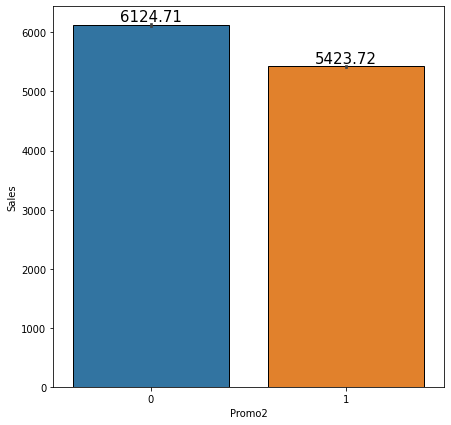

In [52]:
# Sales vs Promo2

plt.figure(figsize=(7,7))

plots=sns.barplot(x=df['Promo2'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')    
plt.show()

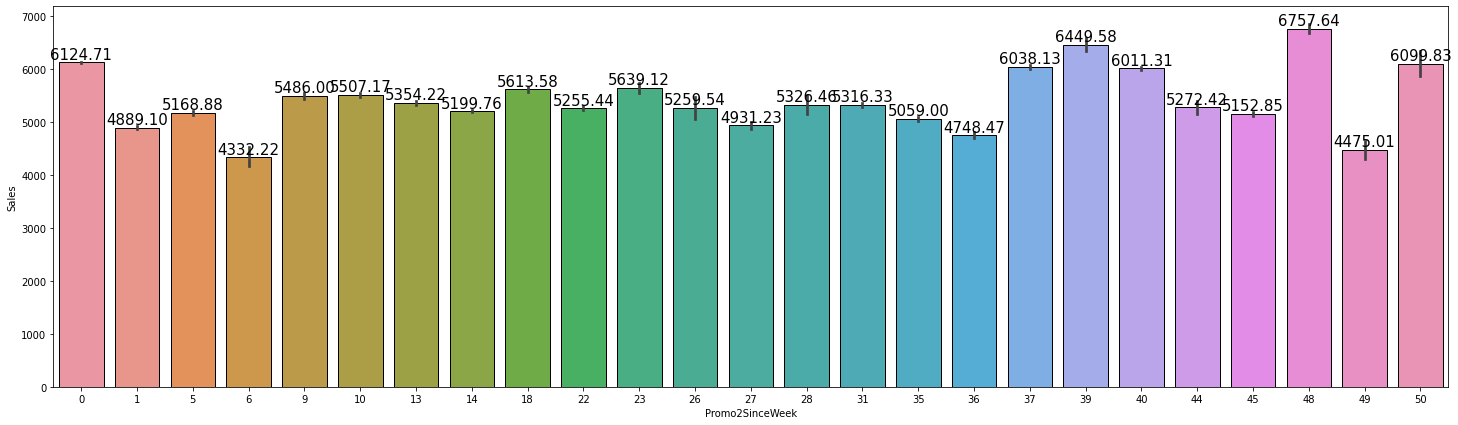

In [53]:
# Sales vs Promo2SinceWeek

plt.figure(figsize=(25,7))

plots=sns.barplot(x=df['Promo2SinceWeek'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')    
plt.show()

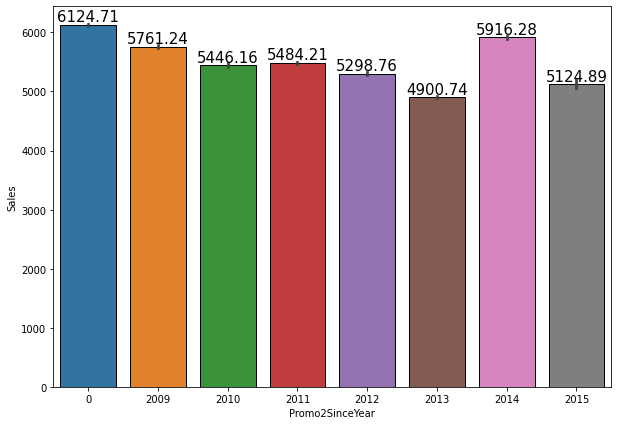

In [54]:
# Sales vs Promo2SinceYear

plt.figure(figsize=(10,7))

plots=sns.barplot(x=df['Promo2SinceYear'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')    
plt.show()

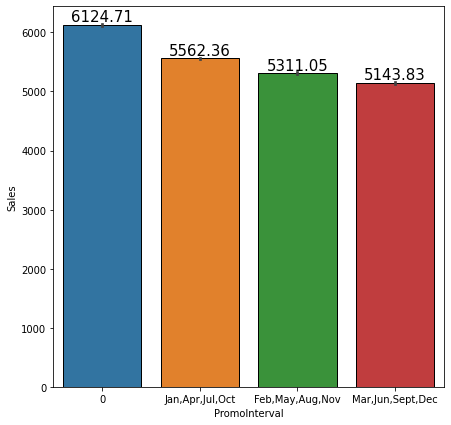

In [55]:
# Sales vs PromoInterval

plt.figure(figsize=(7,7))

plots=sns.barplot(x=df['PromoInterval'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')    
plt.show()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

###Handling Outliers

Now we will create three new variables so that we can we can separate our columns into different category .

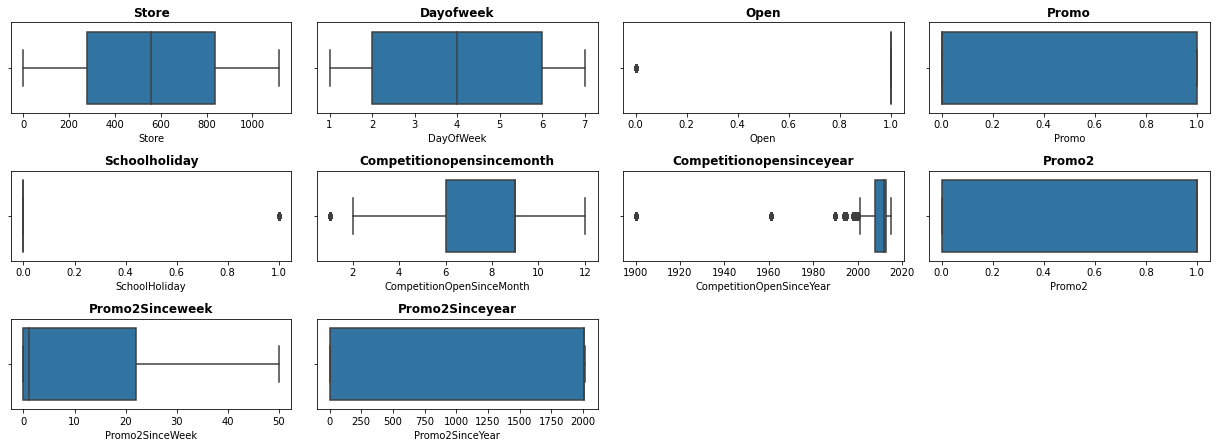

In [58]:
# Checking outliers for numerical columns

numerical_col=['Store','DayOfWeek','Open','Promo','SchoolHoliday','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear']


plt.figure(figsize=(17,10))
for n,column in enumerate(numerical_col):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

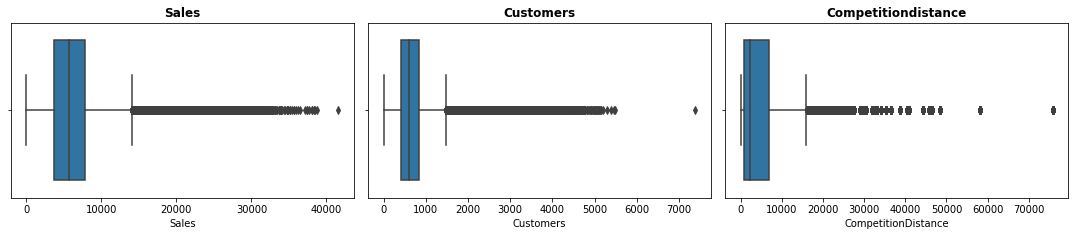

In [59]:
# Checking outliers for continuous columns

continuous_col=['Sales','Customers','CompetitionDistance']

plt.figure(figsize=(20,15))
for n,column in enumerate(continuous_col):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

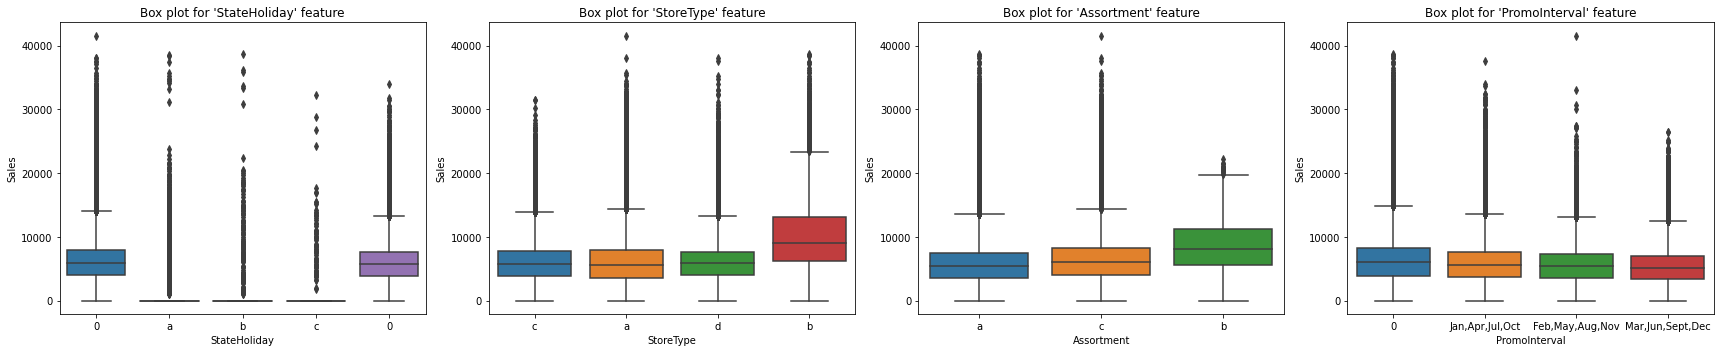

In [60]:
# Checking outliers for categorical columns

categorical_col=['StateHoliday','StoreType','Assortment','PromoInterval']

plt.figure(figsize=(24,5))
for i,col in enumerate(categorical_col):
  plt.subplot(1,4,i+1)
  sns.boxplot( x = df[col],y = 'Sales', data = df )
  plt.title(f"Box plot for '{col}' feature")
  plt.tight_layout()

There are several outliers in numerical , continuous and categorical columuns .

We have to treat these outliers . We will remove these outliers by IQR ( Interquartile range )method .

First we will consider numerical and continuous columns and then after that we will consider categorical columns .

In [61]:
# Knowing the percentage of outliers 

# Let's first make a list of columns of numerical and continuous variables containing outliers
col_containg_otlr = ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Sales','Customers']

# defining the code for outlier detection and percentage using IQR.
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in col_containg_otlr:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

CompetitionOpenSinceMonth :
q1:6.0, q2:9.0, q3:9.0
Lower bound: 1.5, Upper bound: 13.5, IQR: 3.0
Total number of outliers are: 12452
Total percentage of outlier is: 1.22 %


CompetitionOpenSinceYear :
q1:2008.0, q2:2012.0, q3:2013.0
Lower bound: 2000.5, Upper bound: 2020.5, IQR: 5.0
Total number of outliers are: 27524
Total percentage of outlier is: 2.71 %


Sales :
q1:3727.0, q2:5744.0, q3:7856.0
Lower bound: -2466.5, Upper bound: 14049.5, IQR: 4129.0
Total number of outliers are: 26694
Total percentage of outlier is: 2.62 %


Customers :
q1:405.0, q2:609.0, q3:837.0
Lower bound: -243.0, Upper bound: 1485.0, IQR: 432.0
Total number of outliers are: 38095
Total percentage of outlier is: 3.75 %




In [62]:
# Defining the function that treats outliers with the IQR technique
def treat_outliers_iqr(data):
    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Identify the outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    # Treat the outliers (e.g., replace with the nearest quartile value)
    treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in data]
    treated_data_int = [int(absolute) for absolute in treated_data]
    
    return treated_data_int

In [63]:
#Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
for feature in col_containg_otlr:
  df[feature]= treat_outliers_iqr(df[feature])

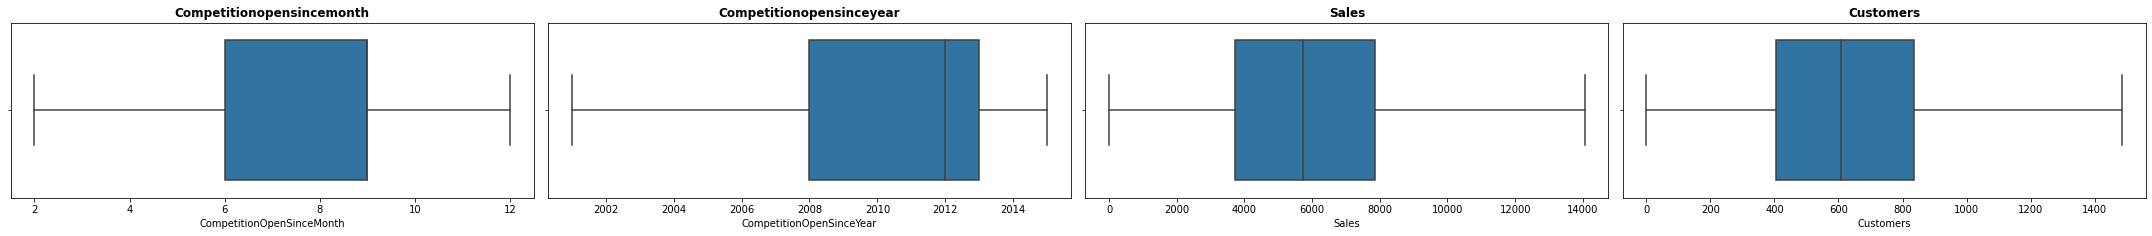

In [64]:
#Replotting the box plots and rechecking the percentage of outliers still available(if any) in the list of continous_value_feature.
plt.figure(figsize=(30,15))
for n,column in enumerate(col_containg_otlr):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [65]:
# Rechecking the total number of outliers and its percentage present in our dataset.
for feature in col_containg_otlr:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

CompetitionOpenSinceMonth :
q1:6.0, q2:9.0, q3:9.0
Lower bound: 1.5, Upper bound: 13.5, IQR: 3.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionOpenSinceYear :
q1:2008.0, q2:2012.0, q3:2013.0
Lower bound: 2000.5, Upper bound: 2020.5, IQR: 5.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Sales :
q1:3727.0, q2:5744.0, q3:7856.0
Lower bound: -2466.5, Upper bound: 14049.5, IQR: 4129.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Customers :
q1:405.0, q2:609.0, q3:837.0
Lower bound: -243.0, Upper bound: 1485.0, IQR: 432.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %




In [66]:
cat_col_containg_otlr=['CompetitionDistance','StateHoliday','StoreType','Assortment','PromoInterval']


###Multicollinearity


Now we will see how the columns of the merged dataframe ' df ' are correlated .

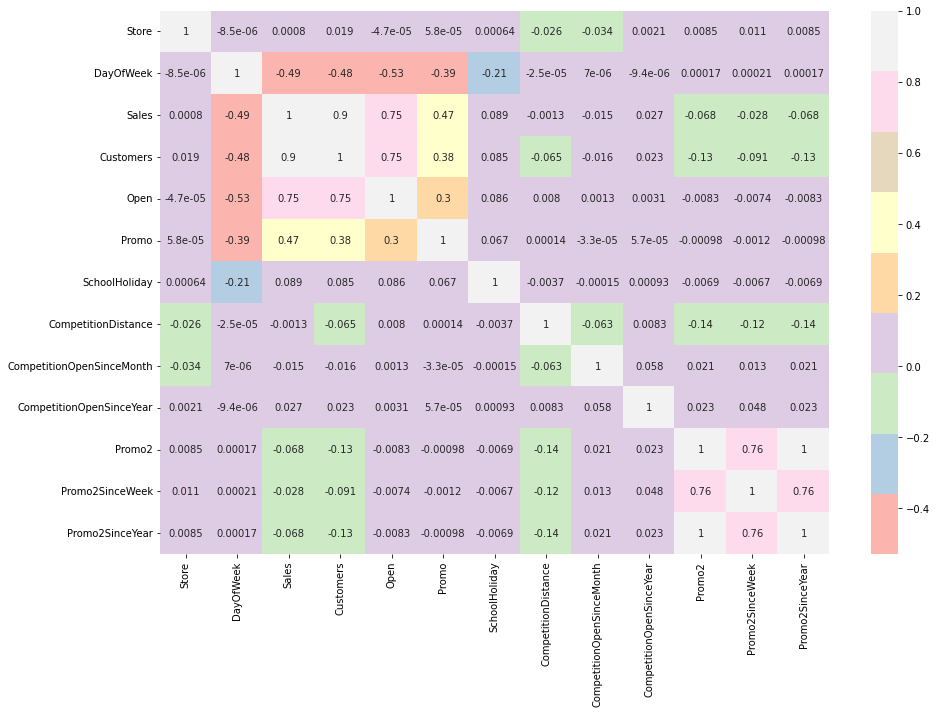

In [67]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot= True,cmap=sns.color_palette('Pastel1'))

Observations :

*   Open and Sales have a moderate positive correlation .
*   Open and Customers also have a moderate positive correlation .

*   Promo2 , Promo2SinceWeek , Promo2SinceYear have a high positive correlation .

###Variance Inflation Factor

###Encoding